# WER on single recording end to end

#### Common packages

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%load_ext autoreload
%autoreload 2

In [99]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from graphviz import Digraph
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


## Split Corpus into Recordings $\langle A_i,T_i \rangle$ and Transcription Splits $\langle A_{i,j}, T_{i,j} \rangle$ within Recordings

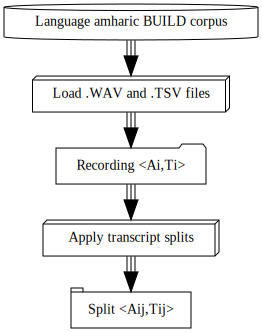

In [3]:
from Cfg import Cfg
import split_corpus_into_recordings_and_splits
C = Cfg('NIST', 8000, 'amharic') 
split_corpus_into_recordings_and_splits.diagram(C)

In [4]:
from RecordingCorpus import RecordingCorpus
from multiprocessing import Pool
if __name__ == '__main__':
    with Pool(16) as pool:
        recordings = RecordingCorpus(C, pool)

100%|██████████| 122/122 [00:02<00:00, 45.09it/s]


In [5]:
from SplitCorpus import SplitCorpus
splits=SplitCorpus.from_recordings(C, recordings)

## Subsplit $A_{i,j}$ on silence and apportion text to trimmed chunks by word sizes in $T_{i,j} = \langle w_{i,j,k} \rangle$ where $w_{i,j,k}=\langle g_{i,j,k,l} \rangle$

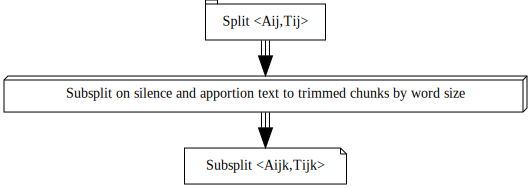

In [6]:
import subsplit_Aij_on_silence_and_apportion_text_by_size
subsplit_Aij_on_silence_and_apportion_text_by_size.diagram

In [7]:
from SubSplitCorpus import SubSplitCorpus

In [8]:
import pickle
with open('bfgpu.pkl', 'rb') as f:
    subsplits=pickle.load(f)

# Train ASR NN on subsplits $A_{i,j,k} \to P_{i,j,k} \approx T_{i,j,k}$

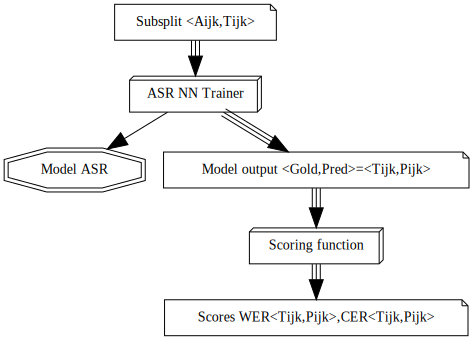

In [9]:
import train_ASR_NN_on_subsplits
train_ASR_NN_on_subsplits.diagram

In [10]:
import os
os.environ['IN_JUPYTER']='True'

In [11]:
from ASR_NN import ASR_NN

In [12]:
model_ASR = ASR_NN(C);

INFO:root:Trainer is initialized
DEBUG:tensorflow:Falling back to TensorFlow client; we recommended you install the Cloud TPU client directly with pip install cloud-tpu-client.


In [13]:
model_ASR.load_model();

INFO:root:Transformer(
  (encoder): Encoder(
    (dropout): Dropout(p=0.1, inplace=False)
    (input_linear): Linear(in_features=2560, out_features=512, bias=True)
    (layer_norm_input): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
    (positional_encoding): PositionalEncoding()
    (layers): ModuleList(
      (0): EncoderLayer(
        (self_attn): MultiHeadAttention(
          (query_linear): Linear(in_features=512, out_features=512, bias=True)
          (key_linear): Linear(in_features=512, out_features=512, bias=True)
          (value_linear): Linear(in_features=512, out_features=512, bias=True)
          (attention): ScaledDotProductAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (softmax): Softmax(dim=2)
          )
          (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (output_linear): Linear(in_features=512, out_features=512, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (po

In [30]:
bad=[x for x in subsplits.artifacts if x.source.n_samples <=370 or x.target.n_chars == 0]
good=[x for x in subsplits.artifacts if x.source.n_samples >370 and x.target.n_chars != 0]
subsplits.artifacts=good
subsplits.problems=bad
from ArtifactsVector import ArtifactsVector
subsplits.population=ArtifactsVector(C, subsplits.artifacts)

In [34]:
from utils import constant
constant.args.augment=False

In [35]:
model_ASR.load_training_set(subsplits)

In [36]:
ASR_output = model_ASR.train()

INFO:root:name amharic_8000_end2end_asr_pytorch_drop0.1_cnn_batch12_4_vgg_layer4_gradscaler


WELCOME TO PAN AMERICAN AIRWAYS


INFO:root:TRAIN
(Epoch 1) TRAIN LOSS:2.3831 CER:64.24% LR:0.0000112: 100%|██████████| 36282/36282 [36:32<00:00, 16.55it/s]
INFO:root:(Epoch 1) TRAIN LOSS:2.3831 CER:64.24% LR:0.0000112


SAVE MODEL to save/amharic_8000_end2end_asr_pytorch_drop0.1_cnn_batch12_4_vgg_layer4_gradscaler/epoch_1__None_37429.th
SAVE MODEL to save/amharic_8000_end2end_asr_pytorch_drop0.1_cnn_batch12_4_vgg_layer4_gradscaler/best_model.th
SAVE MODEL to save/amharic_8000_end2end_asr_pytorch_drop0.1_cnn_batch12_4_vgg_layer4_gradscaler/epoch_1__None_37429.th
SAVE MODEL to save/amharic_8000_end2end_asr_pytorch_drop0.1_cnn_batch12_4_vgg_layer4_gradscaler/best_model.th


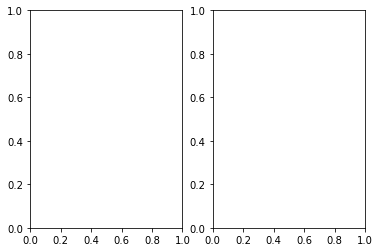

In [103]:
fig, axes = plt.subplots(nrows=1, ncols=2)

In [108]:
dir(axes[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_text',
 '_adjustable',
 '_agg_filter',
 '_alpha',
 '_anchor',
 '_animated',
 '_aspect',
 '_autoscaleXon',
 '_autoscaleYon',
 '_autotitlepos',
 '_axes',
 '_axes_class',
 '_axes_locator',
 '_axisbelow',
 '_clipon',
 '_clippath',
 '_contains',
 '_convert_dx',
 '_current_image',
 '_default_contains',
 '_facecolor',
 '_frameon',
 '_gci',
 '_gen_axes_patch',
 '_gen_axes_spines',
 '_get_axis_list',
 '_get_axis_map',
 '_get_clipping_extent_bbox',
 '_get_lines',
 '_get_patches_for_fill',
 '_get_view',
 '_gid',
 '_gridOn',
 '_in_layout',
 '_init_axis',
 '_label',
 '_layoutbox',
 '_left_title'

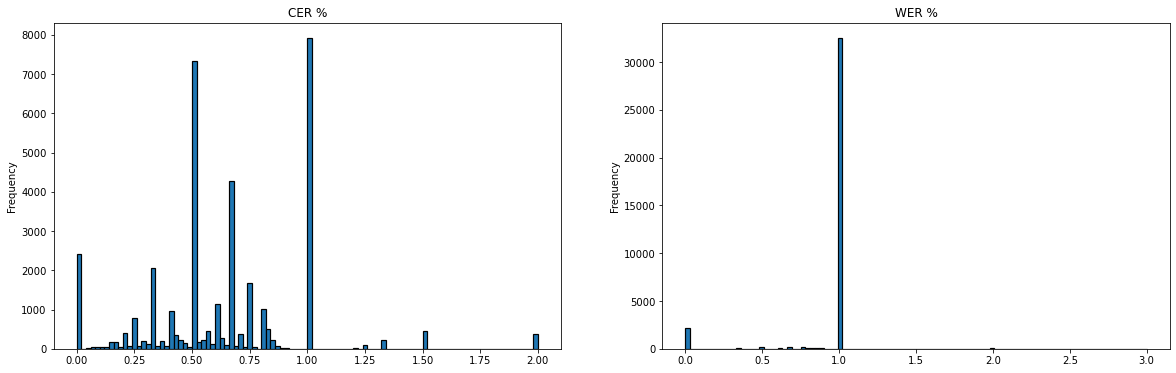

In [115]:
ASR_scores = model_ASR.score(ASR_output)

Clean up GPU memory for next phase

In [ ]:
import torch
del model_ASR
torch.cuda.empty_cache() 

## Concatenate $P_{i,j,k}$ giving $P_{i,j} = P_{i,j,1}\|\cdots\|P_{i,j,-1}$

In [ ]:
import concatenate_Pikj_giving_Pij
concatenate_Pikj_giving_Pij.diagram

In [ ]:
Pijk=ASR_output.pred
Pij=ASR_NN_trainer.concatenate(Pijk)

## Train text-to-text corrector on both $P_{i,j,k} \to Q_{i,j,k} \approx T_{i,j,k}$ and $P_{i,j} \to Q_{i,j} \approx T_{i,j}$ and score

In [ ]:
import train_text_to_text_corrector_on_Pij_and_Pijk_and_score
train_text_to_text_corrector_on_Pij_and_Pijk_and_score.diagram

In [ ]:
torch.cuda.empty_cache()

## Subsplit $A_{i,j}$ on silence alone retaining timecode $(s_{i,j,k},e_{i,j,k})$ giving $A_{i,j} = \langle (\alpha_{i,j,k}, (s_{i,j,k},e_{i,j,k})) \rangle$ so that $\alpha_{i,j,k} = A_{i,j}[s_{i,j,k}:e_{i,j,k}]$

In [ ]:
import subsplit_Aij_on_silence_retaining_timecode
subsplit_Aij_on_silence_retaining_timecode.diagram

## Infer $(\alpha_{i,j,k}, (s_{i,j,k},e_{i,j,k})) \xrightarrow{ASR} p_{i,j,k} $

In [ ]:
import infer_aijk_giving_pijk
infer_aijk_giving_pijk.diagram

In [ ]:
torch.cuda.empty_cache() 

## Concatenate $p_{i,j,k} \to p_{i,j}$

In [ ]:
import concatenate_pikj_giving_pij
concatenate_pikj_giving_pij.diagram

## Infer $p_{i,j} \xrightarrow{TT} (q_{i,j},(s_{i,j,0},e_{i,j,-1}))$ 

In [ ]:
import infer_pij_giving_qij
infer_pij_giving_qij.diagram

In [ ]:
torch.cuda.empty_cache() 

## Concatenate $\langle \langle (q_{i,j,k},(s_{i,j,k},e_{i,j,k})) \rangle \rangle $ giving transcript $Q_i = \langle (q_{i,j}, (s_{i,j,0},e_{i,j,-1})) \rangle$

In [ ]:
import concatenate_qijk_giving_Qi
concatenate_qijk_giving_Qi.diagram

## Save transcript $Q_i$ in .CTM format

In [ ]:
import save_transcript_Qi_in_CTM_format
save_transcript_Qi_in_CTM_format.diagram

## Score $\langle T_i,Q_i\rangle$ using `sclite` for each recording individually

In [ ]:
import score_TiQi_using_sclite_per_recording
score_TiQi_using_sclite_per_recording.diagram

## Score $\langle T_i,Q_i\rangle$ using `sclite` collectively

In [ ]:
import score_TiQi_using_sclite_on_all_recordings_together
score_TiQi_using_sclite_on_all_recordings_together.diagram